In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

plt.style.use('ggplot')

import nltk


In [186]:
combined_reviews_df = pd.read_csv('../data/processed/cleaned_combined_reviews_data.csv')

In [187]:
combined_reviews_df.head()

,review_id,rating,likes,date_review_scraped,review_date,source,review_text,owner_response_text,location_id
0,Ci9DQUlRQUNvZENodHljRjlvT25jdFNHdDJTamhUYlhkRU...,1.0,0,2025/12/16,2025/08/18,Google Maps,i brought my son to this location today for a ...,"hi divya, thank you for sharing your experienc...",1
1,Ci9DQUlRQUNvZENodHljRjlvT2pCSVpGQXdWWEZyZW5OWF...,1.0,0,2025/12/16,2025/10/17,Google Maps,9/16/25 9:30am got my hair cut at the parmer a...,"hi dale, thank you for sharing your experience...",1
2,ChZDSUhNMG9nS0VJQ0FnTURvckt6S2FBEAE,1.0,0,2025/12/16,2025/05/20,Google Maps,worst great clips i’ve ever been to. older man...,"thank you for your feedback, arturo. we're sor...",1
3,Ci9DQUlRQUNvZENodHljRjlvT25KdGRWOTBNV3A0V1ZSQm...,5.0,0,2025/12/16,2025/10/17,Google Maps,myra did my long hair straight cut since glenn...,"hi cheryl, thank you for your wonderful review...",1
4,ChZDSUhNMG9nS0VJQ0FnSUR2LVBiOUVREAE,1.0,1,2025/12/16,2025/01/20,Google Maps,terrible experience at great clips i had the w...,we're sorry to hear this was your experience. ...,1


## **EDA and Visualizations**

In [188]:
combined_reviews_df.info()

'''
NOTE:
notice the 'review_text' and 'ownder_response_text' non-null counts are lower than the total number of rows
which might indicate that there are some reviews without text or owner responses
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   review_id            1266 non-null   object 
 1   rating               1266 non-null   float64
 2   likes                1266 non-null   int64  
 3   date_review_scraped  1266 non-null   object 
 4   review_date          1266 non-null   object 
 5   source               1266 non-null   object 
 6   review_text          848 non-null    object 
 7   owner_response_text  1209 non-null   object 
 8   location_id          1266 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 89.1+ KB


"\nNOTE:\nnotice the 'review_text' and 'ownder_response_text' non-null counts are lower than the total number of rows\nwhich might indicate that there are some reviews without text or owner responses\n"

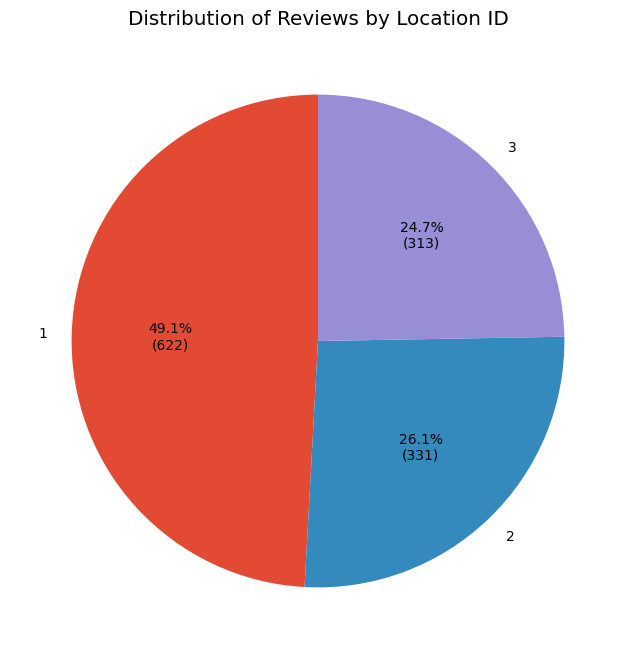

In [189]:
# Distribution of reviews by location (fig. 1)

def autopct_format(pct, all_values):
    '''To format pie chart labels with both percentages and absolute values'''
    absolute = int(round(pct/100.0 * sum(all_values)))
    return f'{pct:.1f}%\n({absolute})'


location_distribution = combined_reviews_df['location_id'].value_counts()
location_distribution.plot(kind='pie',
                           figsize=(8, 8),
                           autopct=lambda pct: autopct_format(pct, location_distribution),
                           startangle=90,
                           title='Distribution of Reviews by Location ID')
plt.ylabel('')
plt.show()


In [190]:
# plotly version of fig. 1

location_distribution = combined_reviews_df['location_id'].value_counts()
figure_no1 = go.Figure()

# pie with labels outside pie chart (behind visible pie)
figure_no1.add_trace(go.Pie(
    labels=location_distribution.index,
    values=location_distribution.values,
    textinfo='label',
    textposition='outside',
    sort=False,
    direction='clockwise',
    showlegend=True,
    marker=dict(colors=px.colors.sequential.RdBu)
))

# visible pie with percentages inside pie chart (stacked on top of previous pie)
figure_no1.add_trace(go.Pie(
    labels=location_distribution.index,
    values=location_distribution.values,
    textinfo='percent',
    textposition='inside',
    sort=False,
    direction='clockwise',
    showlegend=True,
    marker=dict(colors=px.colors.sequential.RdBu),
    insidetextfont=dict(color='white')
))

figure_no1.update_traces(domain={'x': [0, 1], 'y': [0, 1]},
                         hovertemplate='Number of Reviews: %{value}<extra></extra>',
                         hoverinfo='value',
                         marker_line_width=1.5,
                         marker_line_color='white')

figure_no1.update_layout(
    margin=dict(t=75, b=75, l=75, r=75),
    title={
        'text': 'Distribution of Reviews by Location ID',
        'x': 0.5
    },
    legend_title='Location ID',
    width=750,
    height=500,
    legend=dict(orientation='v',
                x=1.0, y=0.5,
                xanchor='left',
                yanchor='middle')
)

figure_no1.show()

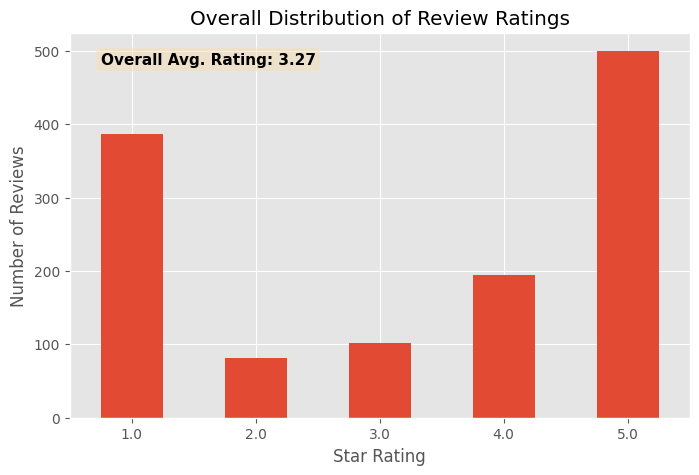

In [191]:
# Overall distribution of star ratings w/ overall average rating of all 3 locations (fig. 2)

star_ratings = combined_reviews_df['rating'].value_counts().sort_index() \
                                           .plot(kind='bar', 
                                                 title='Overall Distribution of Review Ratings',  
                                                 figsize=(8,5))

overall_avg_rating = combined_reviews_df['rating'].mean()
plt.text(0.05, 0.95, f'Overall Avg. Rating: {overall_avg_rating:.2f}',
         transform=star_ratings.transAxes,
         ha='left', va='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         fontsize=11, fontweight='bold')

star_ratings.set_xlabel('Star Rating')
star_ratings.set_ylabel('Number of Reviews')
star_ratings.set_xticklabels(star_ratings.get_xticklabels(), rotation=0)
plt.show()

In [192]:
star_ratings = combined_reviews_df['rating'].value_counts().sort_index()
star_ratings

rating
1.0    387
2.0     82
3.0    102
4.0    195
5.0    500
Name: count, dtype: int64

In [193]:
# ploty version of fig. 2

star_ratings = combined_reviews_df['rating'].value_counts().sort_index()
avg_rating = combined_reviews_df['rating'].mean()

figure_no2 = go.Figure()

figure_no2.add_trace(go.Bar(
    x=star_ratings.index.astype(str),
    y=star_ratings.values,
    text=star_ratings.values,
    textposition='outside',
    marker=dict(color='rgb(102, 197, 204)'),
    marker_line=dict(color='rgb(102, 102, 102)', width=1),
    hoverinfo='skip'
))

figure_no2.add_annotation(
    x=2, y=max(star_ratings.values),
    text=f'Avg Rating: {avg_rating:.2f}',
    showarrow=False,
    bgcolor='beige',
    bordercolor='black'
)

figure_no2.update_layout(
    title={
        'text': 'Distribution of Ratings Across All Locations',
        'x': 0.5
    },
    xaxis_title='Rating',
    yaxis_title='Number of Reviews',
    width=750,
    height=500,
    margin=dict(t=75, b=75, l=75, r=75)
)

figure_no2.show()

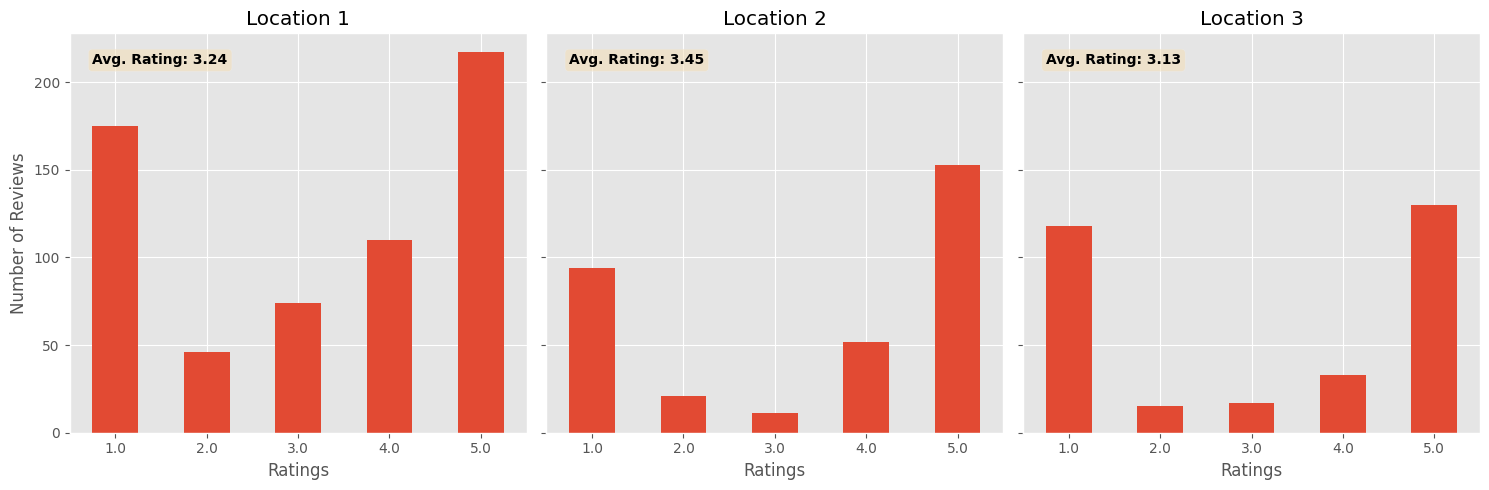

In [194]:
# Distribution of star ratings by location ID w/ avg rating by location (fig. 3)

locations = combined_reviews_df['location_id'].unique()

fig, axes = plt.subplots(1, len(locations), figsize=(15,5), sharey=True)

for i, location in enumerate(locations):
    location_data = combined_reviews_df[ combined_reviews_df['location_id'] == location ]
    avg_rating = location_data['rating'].mean()

    location_data['rating'].value_counts().sort_index().plot(kind='bar', 
                                                             ax = axes[i],
                                                             title=f'Location {location}')
    
    axes[i].text(0.05, 0.95, f'Avg. Rating: {avg_rating:.2f}',
                transform=axes[i].transAxes,
                ha='left', va='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                fontsize=10, fontweight='bold')

    axes[i].set_xlabel('Ratings')
    axes[i].set_ylabel('Number of Reviews')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)



plt.tight_layout()
plt.show()


In [195]:
# plotly version of fig 3.

location_stats = {
    loc: {
        'counts': combined_reviews_df[ combined_reviews_df['location_id'] == loc ]['rating'].value_counts().sort_index(),
        'avg_rating': combined_reviews_df[ combined_reviews_df['location_id'] == loc ]['rating'].mean(),
        'total_number_reviews': len(combined_reviews_df[ combined_reviews_df['location_id'] == loc ])
    }
    for loc in combined_reviews_df['location_id'].unique()
}

figure_no3 = go.Figure()
locations = list(location_stats.keys())
buttons = []

for i, (loc, stats) in enumerate(location_stats.items()):
    # create trace for location
    figure_no3.add_trace(go.Bar(
        x=stats['counts'].index.astype(str),
        y=stats['counts'].values,
        text=stats['counts'].values,
        textposition='outside',
        name=f'Location {loc}',
        visible=(i == 0),
        hoverinfo='skip',
        marker_line=dict(color='rgb(102, 102, 102)',width=1),
        marker=dict(color=px.colors.sequential.Agsunset)
        )
    )

    # create button for location
    buttons.append(
        dict(
            label=f'Location {loc}',
            method='update',
            args=[
                {'visible': [j == i for j in range(len(locations))]},
                {
                    'annotations': [
                        dict(
                            x=1.20, y=0.85,
                            xref='paper', yref='paper',
                            text=f"<b>Location {loc}</b><br>Avg Rating: {stats['avg_rating']:.2f}<br>Total Reviews: {stats['total_number_reviews']}",
                            showarrow=False,
                            bgcolor='beige',
                            bordercolor='black',
                            borderwidth=1,
                            borderpad=6
                        )
                    ]
                }
            ]
        )
    )

# Initial location stats on plot render
initial_location = locations[0]
initial_data = combined_reviews_df[combined_reviews_df['location_id'] == initial_location]
initial_avg = initial_data['rating'].mean()
initial_total = len(initial_data)

figure_no3.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True,
            x=1.18,              # Right side of bar plot
            y=1.0,               # Above the stats box
        )
    ],
    title={'text': 'Rating Distribution by Location', 'x': 0.5},
    xaxis=dict(title='Rating', ticklabelstandoff=10),
    yaxis=dict(title='Number of Reviews', ticklabelstandoff=10),
    width=1000, height=500,
    margin=dict(t=60, b=60, l=100, r=165),
    annotations=[
        dict(
            x=1.20, y=0.85,
            xref='paper', yref='paper',
            text=f'<b>Location {initial_location}</b><br>Avg Rating: {initial_avg:.2f}<br>Total Reviews: {initial_total}',
            showarrow=False,
            bgcolor='beige',
            bordercolor='black',
            borderwidth=1,
            borderpad=6
        )
    ]
)

figure_no3.show()

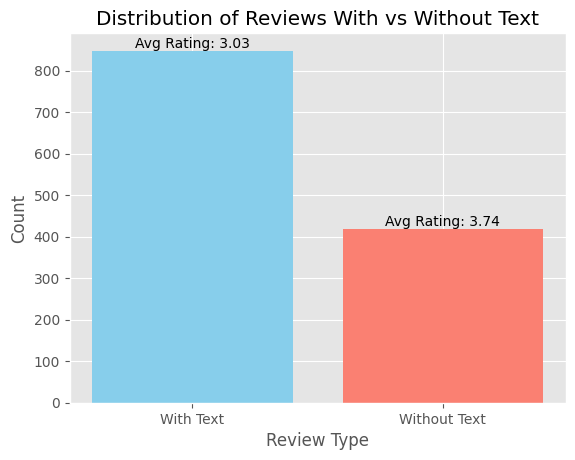

In [196]:
# Distribution of Reviews With vs. Without Text (fig. 4)

text_status = (combined_reviews_df['review_text'].notna() & (combined_reviews_df['review_text'].str.strip() != ''))

with_text = text_status.sum()
without_text = (~text_status).sum()

avg_rating_with_text = combined_reviews_df[text_status]['rating'].mean()
avg_rating_without_text = combined_reviews_df[~text_status]['rating'].mean()

labels = ['With Text', 'Without Text']
counts = [with_text, without_text]
avg_ratings = [avg_rating_with_text, avg_rating_without_text]

barplot_text_status = plt.bar(labels, counts, color=['skyblue', 'salmon'])

for i, (bar, avg) in enumerate(zip(barplot_text_status, avg_ratings)):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'Avg Rating: {avg:.2f}', 
             ha='center', 
             va='bottom')

plt.xlabel('Review Type')
plt.ylabel('Count')
plt.title('Distribution of Reviews With vs Without Text')
plt.show()


# NOTE:
# Reviews with text have a lower average rating compared to those without text
# This might suggest that users are more likely to leave text reviews when they have stronger opinions, either positive or negative

In [197]:
# plotly version of fig 4.

has_text = combined_reviews_df['review_text'].notna() & (combined_reviews_df['review_text'].str.strip() != '') # filtering mask

text_stats = {
    'With Text': {
        'count': has_text.sum(),
        'avg_rating': combined_reviews_df[has_text]['rating'].mean()
    },
    'Without Text': {
        'count': (~has_text).sum(),
        'avg_rating': combined_reviews_df[~has_text]['rating'].mean()
    }
}

figure_no4 = go.Figure(go.Bar(
        x=list(text_stats.keys()),
        y=[text_stats[k]['count'] for k in text_stats.keys()],
        text=[f"Avg. Rating: {text_stats[k]['avg_rating']:.2f}" for k in text_stats.keys()],
        textposition='outside',
        marker=dict(color=['#3c19f0', '#dd2bfd']),
        marker_line=dict(color='rgb(102,102,102)', width=2),
        hovertemplate='Count: %{y}<extra></extra>'
    )
)

figure_no4.update_layout(
    title={'text': 'Distribution of Reviews With vs. Without Text', 'x': 0.5},
    xaxis=dict(title='Text Status of Review', ticklabelstandoff=10),
    yaxis=dict(title='Number of Reviews', ticklabelstandoff=10),
    width=600, height=550,
    margin=dict(t=50, b=50, l=100, r=75)
)

figure_no4.show()


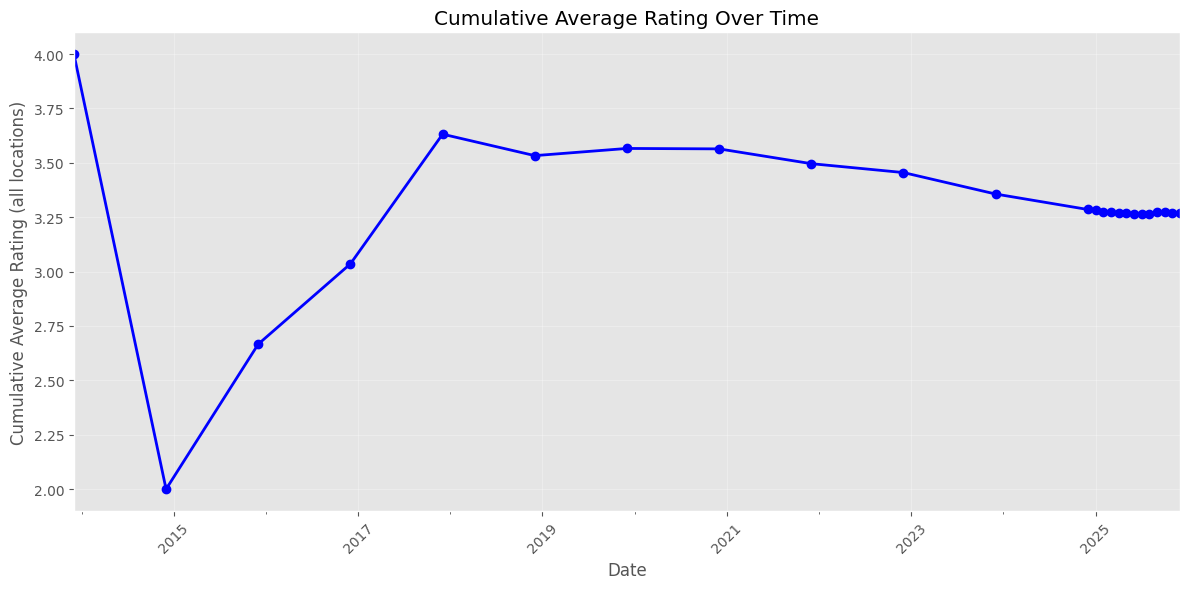

In [198]:
# Trend of average ratings over time for all locations (fig. 5)

trend = combined_reviews_df.sort_values('review_date')
trend['cumulative_avg'] = trend['rating'].expanding().mean()

trend['review_date'] = pd.to_datetime(trend['review_date'])
trend['year_month'] = trend['review_date'].dt.to_period('M')

monthly_data = trend.groupby('year_month')['cumulative_avg'].last()

plt.figure(figsize=(12, 6))
monthly_data.plot(kind='line', marker='o', linewidth=2, color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Average Rating (all locations)')
plt.title('Cumulative Average Rating Over Time')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

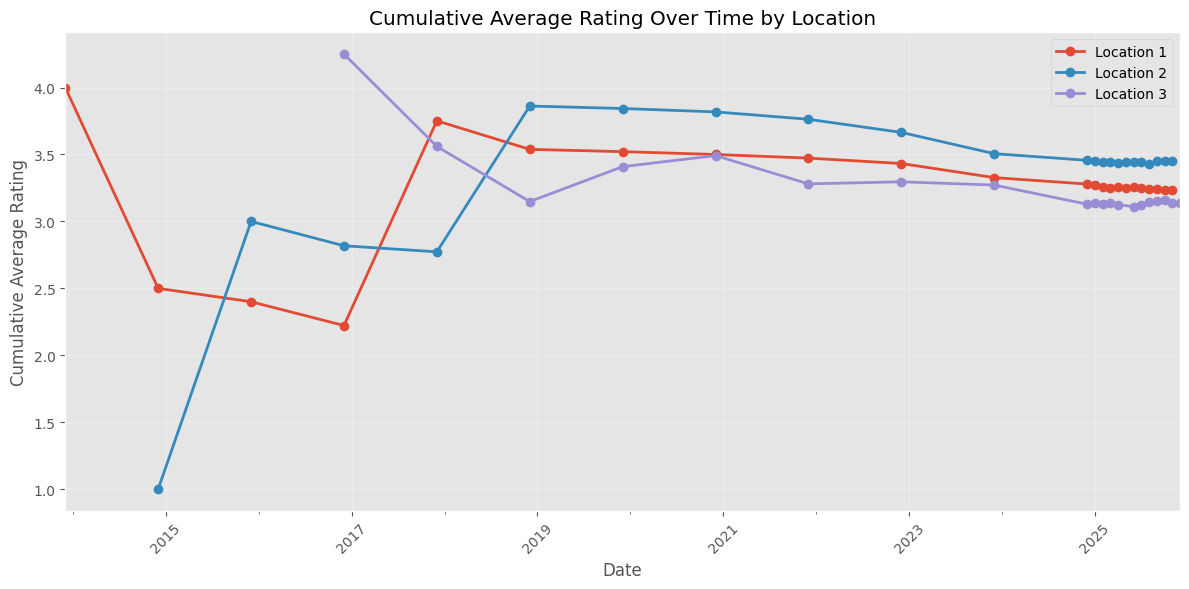

In [199]:
# Cumulative Average Rating Over Time by Location (fig. 6)

trend['review_date'] = pd.to_datetime(combined_reviews_df['review_date'])
trend = trend.sort_values('review_date')
trend['year_month'] = trend['review_date'].dt.to_period('M')

plt.figure(figsize=(12, 6))

for location in trend['location_id'].unique():
    location_data = trend[ trend['location_id'] == location ].copy()
    location_data['cumulative_avg'] = location_data['rating'].expanding().mean()
    monthly_data = location_data.groupby('year_month')['cumulative_avg'].last()
    monthly_data.plot(kind='line', marker='o', linewidth=2, label=f'Location {location}')



plt.xlabel('Date')
plt.ylabel('Cumulative Average Rating')
plt.title('Cumulative Average Rating Over Time by Location')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


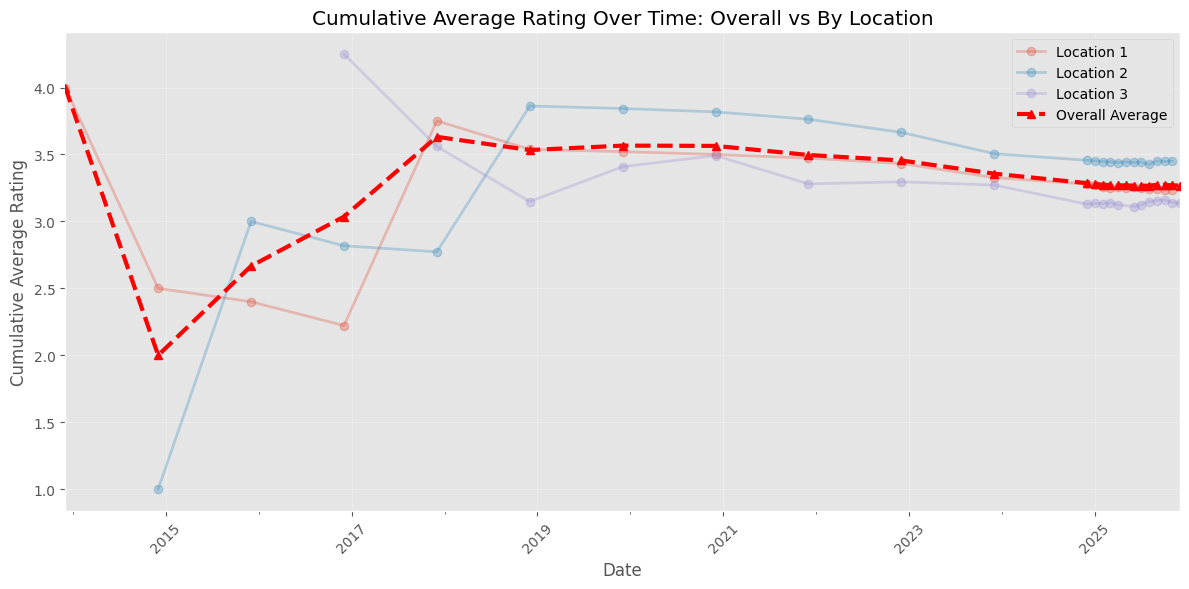

In [200]:
# Fig. 5 and Fig. 6 Overlayed With an Emphasis in the Cumulative Average (fig. 7)

trend = combined_reviews_df.sort_values('review_date')
trend['review_date'] = pd.to_datetime(trend['review_date'])
trend['year_month'] = trend['review_date'].dt.to_period('M')

# Create single figure
plt.figure(figsize=(12, 6))

# Plot each location's cumulative average
for location in trend['location_id'].unique():
    location_data = trend[ trend['location_id'] == location ].copy()
    location_data['cumulative_avg'] = location_data['rating'].expanding().mean()
    monthly_data = location_data.groupby('year_month')['cumulative_avg'].last()
    monthly_data.plot(kind='line', marker='o', linewidth=2, label=f'Location {location}', alpha=0.3)

# Plot overall cumulative average (emphasized)
trend_overall = trend.copy()
trend_overall['cumulative_avg'] = trend_overall['rating'].expanding().mean()
monthly_overall = trend_overall.groupby('year_month')['cumulative_avg'].last()
monthly_overall.plot(kind='line', marker='^', linewidth=3, label='Overall Average', 
                     color='red', linestyle='--', zorder=10)

plt.xlabel('Date')
plt.ylabel('Cumulative Average Rating')
plt.title('Cumulative Average Rating Over Time: Overall vs By Location')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# plotly version of fig. 5, 6, and 7

trend = combined_reviews_df.sort_values('review_date').copy()
trend['review_date'] = pd.to_datetime(trend['review_date'])
trend['year_month'] = trend['review_date'].dt.to_period('M')

figure_no5 = go.Figure()

for location in sorted(trend['location_id'].unique()):
    location_data = trend[ trend['location_id'] == location].copy()
    location_data['cumulative_avg'] = location_data['rating'].expanding().mean()
    monthly_data = location_data.groupby('year_month')['cumulative_avg'].last()

    figure_no5.add_trace(go.Scatter(
            x=monthly_data.index.astype(str),
            y=monthly_data.values,
            mode='lines+markers',
            line=dict(width=2, shape='spline'),
            marker=dict(size=5),
            opacity=0.6,
            hovertemplate='    %{fullData.name}     | Avg Rating: %{y:.2f}<extra></extra>',
            xhoverformat='%Y-%m',
            name=f"Location {location}"
        )
    )

trend_overall = trend.copy()
trend_overall['cumulative_avg'] = trend_overall['rating'].expanding().mean()
monthly_overall = trend_overall.groupby('year_month')['cumulative_avg'].last()

figure_no5.add_trace(go.Scatter(
        x=monthly_overall.index.astype(str),
        y=monthly_overall.values,
        mode='lines+markers',
        line=dict(width=3, dash='dash', color='red', shape='spline'),
        marker=dict(size=10, symbol='triangle-up'),
        hovertemplate='%{fullData.name} | Overall Avg: %{y:.2f}<extra></extra>',
        xhoverformat='%Y-%m',
        name='Overall Average'
    )
)

figure_no5.update_layout(
    title={'text': 'Cumulative Average Rating Over Time', 'x': 0.5},
    xaxis=dict(title='Date', tickangle=45, ticklabelstandoff=10, dtick='M6', showspikes=True),
    yaxis=dict(title='Rating', gridcolor='lightgray', gridwidth=0.5, ticklabelstandoff=10, range=[0.5,5.5]),
    legend=dict(
        orientation='v',
        x=1.05,
        y=0.5
    ),
    width=1200, height=600,
    margin=dict(t=75, b=75, l=100, r=100),
    hovermode='x unified',
    plot_bgcolor='white'
)

figure_no5.show()

In [ ]:
monthly_data = location_data.groupby('year_month')['cumulative_avg'].last()
monthly_data
# location_data

In [204]:
figure_no1.write_html('../reports/figures/figure1.html')
figure_no2.write_html('../reports/figures/figure2.html')
figure_no3.write_html('../reports/figures/figure3.html')
figure_no4.write_html('../reports/figures/figure4.html')
figure_no5.write_html('../reports/figures/figure5.html')